# K-Means Clustering

K-Means Clustering is an unsupervised learning algorithm. It tries to cluster data based in their similarities. Since it's an unsupervised learning algorithm, we are not trying to predict an outcome. Instead, we are trying to find patterns in the data.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs

make_blobs generates blob-like groups of data that you can add cluster standard deviations to, say how many features you want (like how many centers), and it allows you to make artificial data you can play with.

In [5]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

data is a **tuple** of numpy arrays

In [7]:
data

(array([[ -6.42884095e+00,   1.01411174e+01],
        [  5.86867888e+00,   5.20110356e+00],
        [ -3.76109375e-01,   3.26427943e+00],
        [  2.16679181e+00,   9.56300522e+00],
        [  5.09508570e+00,   7.20752718e+00],
        [ -1.08788882e+01,  -6.11318040e+00],
        [  2.03405554e+00,   9.76664755e+00],
        [ -1.71798771e+00,   1.41401140e+00],
        [  1.16911341e+00,   8.24556988e+00],
        [ -1.35185444e+00,   3.13245345e+00],
        [ -6.18548214e+00,   9.67406555e+00],
        [ -1.19856602e+00,   2.50408937e+00],
        [  2.90296863e+00,   7.91251003e+00],
        [  2.39250023e+00,   5.38173971e+00],
        [ -5.27545147e+00,   9.63836659e+00],
        [ -5.66814687e-01,   5.60262755e-02],
        [  5.97336628e+00,   5.87172022e+00],
        [ -2.31355268e+00,   5.23980092e-01],
        [ -1.01344756e+01,  -3.43130837e+00],
        [ -4.54082629e+00,   1.13920174e+01],
        [ -1.04155833e+01,  -5.67545836e+00],
        [  6.64796693e-01,   9.423

In [8]:
data[0]

array([[ -6.42884095e+00,   1.01411174e+01],
       [  5.86867888e+00,   5.20110356e+00],
       [ -3.76109375e-01,   3.26427943e+00],
       [  2.16679181e+00,   9.56300522e+00],
       [  5.09508570e+00,   7.20752718e+00],
       [ -1.08788882e+01,  -6.11318040e+00],
       [  2.03405554e+00,   9.76664755e+00],
       [ -1.71798771e+00,   1.41401140e+00],
       [  1.16911341e+00,   8.24556988e+00],
       [ -1.35185444e+00,   3.13245345e+00],
       [ -6.18548214e+00,   9.67406555e+00],
       [ -1.19856602e+00,   2.50408937e+00],
       [  2.90296863e+00,   7.91251003e+00],
       [  2.39250023e+00,   5.38173971e+00],
       [ -5.27545147e+00,   9.63836659e+00],
       [ -5.66814687e-01,   5.60262755e-02],
       [  5.97336628e+00,   5.87172022e+00],
       [ -2.31355268e+00,   5.23980092e-01],
       [ -1.01344756e+01,  -3.43130837e+00],
       [ -4.54082629e+00,   1.13920174e+01],
       [ -1.04155833e+01,  -5.67545836e+00],
       [  6.64796693e-01,   9.42304718e-02],
       [  

In [11]:
data[0].shape

(200, 2)

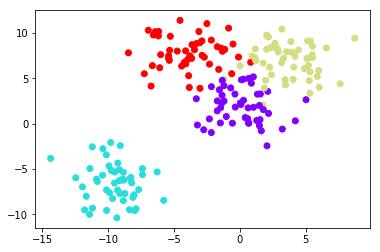

In [19]:
# Grab the first array in data and grab all the rows in the first column.
# Plot them against all the rows in the second column
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

In [18]:
# The second item in the tuple is the cluster it belongs to
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0, 0,
       1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3, 0, 3,
       3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0, 1, 2, 2,
       1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3, 2, 1, 1, 1,
       1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 3, 3, 2, 1,
       2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2, 0, 3, 2, 2, 2, 0, 2,
       0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3, 2, 2, 1, 2, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2, 1, 0])

#### Creating a K-Means Clustering Algorithm

Recall: K-Means is unsupervised.

The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. It then iterates through the data points and reassigns each point to the cluster centroid they're closest to, and then creates a new centroid. The iteration process is then repeated until the variance can't be reduced any further.

In [22]:
from sklearn.cluster import KMeans

In [23]:
# Need to know the number of clusters beforehand
kmeans = KMeans(n_clusters=4)

In [24]:
# Fit it to the features (the features are data[0])
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
# Get an array of the cluster centers
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])

In [26]:
# Get the labels the model believes to be true for the clusters
kmeans.labels_

array([3, 0, 2, 0, 0, 1, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 3, 1, 2, 2,
       1, 3, 1, 1, 2, 0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3, 2, 0,
       3, 2, 1, 2, 2, 3, 0, 2, 1, 3, 2, 2, 3, 0, 1, 0, 1, 3, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 1, 0, 0, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 3, 2, 1, 1, 1,
       1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1, 0, 3, 3, 0, 1,
       0, 3, 3, 0, 3, 2, 3, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3, 2, 1, 1, 3, 0, 3,
       0, 2, 1, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0,
       2, 2, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 0, 0, 1, 2], dtype=int32)

Note: If we're working with real data, and we don't have the labels, we would be done at this stage. We would not be able to compare anything to the real values. Since K-Means Clustering is **unsupervised**, we are only trying to *find patterns* in the data (labels). We are *not making predictions* (about the labels).

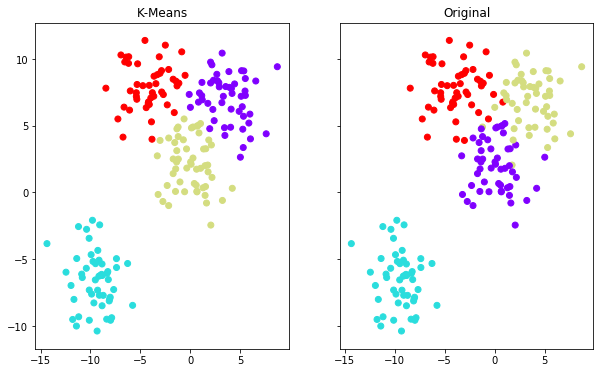

In [28]:
# Create a subplot of 1 row by 2 columns
# sharey -> share the y axis
# Grab the set of axes using tuple unpacking
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# Plot the models data based on what the algorithm thinks the data should look like
ax1.set_title('K-Means')
ax1.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap='rainbow')

# Plot the actual data
ax2.set_title('Original')
ax2.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

The coloring scheme for clusters is a little different in each plot, but if you look closely, you can see where the algorithm had a hard time deciding which cluster a point belonged to when it was surrounded by many other points.